# Manipulating Time Series Data in Python - Part 1

In [36]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

## Working with Time Series in Pandas
This chapter lays the foundations to leverage the powerful time series functionality made available by how Pandas represents dates, in particular by the DateTimeIndex. You will learn how to create and manipulate date information and time series, and how to do calculations with time-aware DataFrames to shift your data in time or create period-specific returns.

### How to use dates & times with pandas

In [17]:
# Timestamp
time_stamp = pd.Timestamp(datetime.datetime(2017, 1, 1))
time_stamp

Timestamp('2017-01-01 00:00:00')

In [18]:
pd.Timestamp('2017-1-1') == time_stamp

True

In [19]:
time_stamp.year, time_stamp.weekday_name

(2017, 'Sunday')

In [20]:
# Period
period = pd.Period('2017-1')
period

Period('2017-01', 'M')

In [21]:
period.asfreq('D')

Period('2017-01-31', 'D')

In [22]:
period.to_timestamp()

Timestamp('2017-01-01 00:00:00')

In [23]:
period.to_timestamp().to_period('M')

Period('2017-01', 'M')

In [24]:
period + 2

Period('2017-03', 'M')

In [26]:
pd.Timestamp('2017-1-31', 'M') + 1

Timestamp('2017-02-28 00:00:00', freq='M')

In [29]:
# Date Range
index = pd.date_range(start='2017-1-1', periods=12, freq='M')
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [30]:
index[0]

Timestamp('2017-01-31 00:00:00', freq='M')

In [31]:
index.to_period()

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]', freq='M')

In [32]:
pd.DataFrame({'data': index}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
data    12 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 176.0 bytes


In [35]:
data = np.random.random((12,2))
pd.DataFrame(data=data, index=index).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: M
Data columns (total 2 columns):
0    12 non-null float64
1    12 non-null float64
dtypes: float64(2)
memory usage: 288.0 bytes


### Your first time series
You have learned in the video how to create a sequence of dates using pd.date_range(). You have also seen that each date in the resulting pd.DatetimeIndex is a pd.Timestamp with various attributes that you can access to obtain information about the date.

Now, you'll create a week of data, iterate over the result, and obtain the dayofweek and weekday_name for each date.

In [2]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7)

In [3]:
# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.weekday_name)

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


### Create a time series of air quality data
You have seen in the video how to deal with dates that are not in the correct format, but instead are provided as string types, represented as dtype object in pandas.

We have prepared a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017) for you to practice the use of pd.to_datetime().

In [37]:
air = pd.read_csv('../datasets/air_quality_data/nyc.csv')
air.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035162,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


In [39]:
# Inspect data
print(air.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None


In [40]:
# Convert the date column to datetime64
air.date = pd.to_datetime(air.date)

In [41]:
# Set date column as index
air = air.set_index('date')

In [42]:
# Inspect data 
print(air.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3)
memory usage: 197.4 KB
None


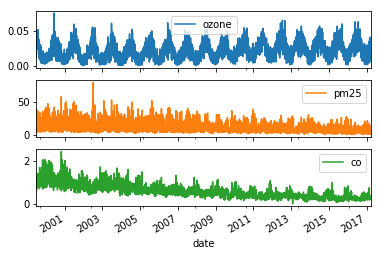

In [44]:
# Plot data
air.plot(subplots=True)
plt.show()

### Compare annual stock price trends
In the video, you have seen how to select sub-periods from a time series.

You'll use this to compare the performance for three years of Yahoo stock prices.

In [63]:
yahoo = pd.read_csv('../datasets/stock/yahoo.csv', index_col='date', parse_dates=['date'])
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [64]:
# Create dataframe prices here
prices = pd.DataFrame()

In [65]:
# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

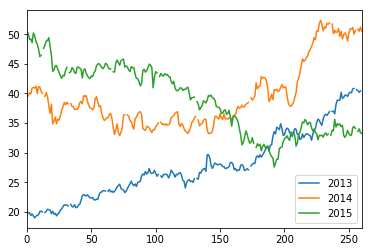

In [66]:
# Plot prices
prices.plot()
plt.show()

### Set and change time series frequency
In the video, you have seen how to assign a frequency to a DateTimeIndex, and then change this frequency.

Now, you'll use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

In [67]:
co = pd.read_csv('../datasets/air_quality_data/co_cities.csv', index_col='date', parse_dates=['date'])
co.head()

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761


In [68]:
# Inspect data
print(co.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: float64(3)
memory usage: 59.3 KB
None


In [69]:
# Set the frequency to calendar daily
co = co.asfreq('D')

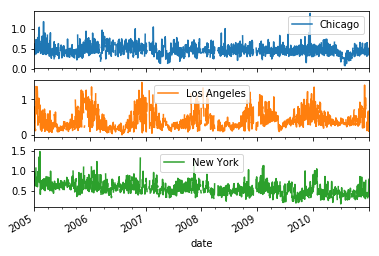

In [70]:
# Plot the data
co.plot(subplots=True)
plt.show()

In [71]:
# Set frequency to monthly
co = co.asfreq('M')

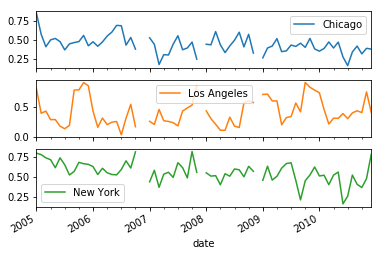

In [72]:
# Plot the data
co.plot(subplots=True)
plt.show()

### Shifting stock prices across time
The first method to manipulate time series that you saw in the video was .shift(), which allows you shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

In [73]:
google = pd.read_csv('../datasets/stock/google.csv', index_col='Date', parse_dates=['Date'])
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [74]:
# Set data frequency to business daily
google = google.asfreq('B')

In [75]:
# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(-90)
google['shifted'] = google.Close.shift(90)

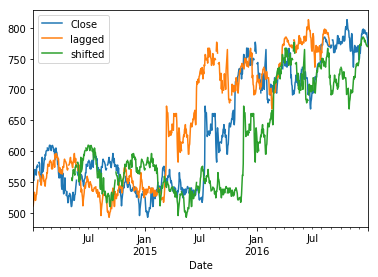

In [76]:
# Plot the google price series
google.plot()
plt.show()

### Calculating stock price changes
You have learned in the video how to calculate returns using current and shifted prices as input. Now you'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function .diff().

In [77]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(30)

In [78]:
# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price - yahoo.shifted_30

In [79]:
# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(30)

In [80]:
# Inspect the last five rows of price
print(yahoo.tail(5))

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64


In [81]:
# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())

0.0    703
dtype: int64


### Plotting multi-period returns
The last time series method you have learned about in the video was .pct_change(). Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We'll be using Google stock prices from 2014-2016.

In [89]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(1).mul(100)

In [90]:
# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

In [91]:
# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

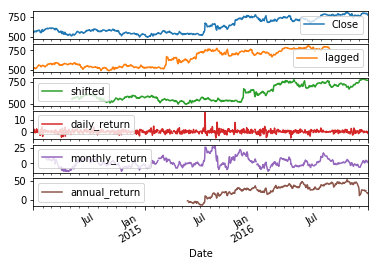

In [92]:
# Plot the result
google.plot(subplots=True)
plt.show()